# __Machine Learning for Beginners__
***

- Video: [Link](https://www.youtube.com/watch?v=KLjTAcH7Ikk&ab_channel=ShashankKalanithi)
- Document: [Link](https://shashankkalanithi.notion.site/Machine-Learning-Course-Notes-4c75346f8169485cb6bc90e1e4f70d5d)

## Chapter 1 - Introduction

Although machine learning can sound incredibly complicated, it doesn't have to be. Over the years many libraries have come out that have drastically simplified the process of creating machine learning algorithms such that you can create a decent model in 5 minutes with 4 lines of code. Don't believe me? Let's try it. I'll build a model that predicts the price of diamonds based on several factors and tell you which factor is most important.

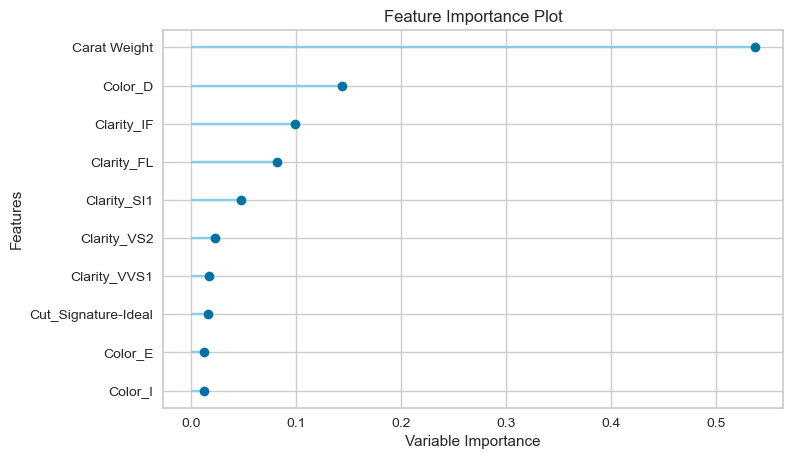

In [97]:
%pip install pycaret
%pip install scikit-learn==0.23.2
from pycaret.datasets import get_data
dataset = get_data('diamond')

from pycaret.regression import *
exp_reg101 = setup(data = dataset, target = 'Price', session_id=123,fold_shuffle=True,imputation_type='iterative')
ada = create_model('ada')

plot_model(ada, plot='feature')

## Chapter 5 - Data Cleaning and Environment Setup

In [98]:
import pandas as pd
import numpy as np

career_data = pd.read_csv("career_data.csv")

### Remove Columns with One Unique Value

In [99]:
print(len(career_data.columns))
# Columns with One Unique Value
print(career_data.nunique())

30
uniq_id                         3000
crawl_timestamp                 2968
job_title                       2096
company_name                     747
post_date                         81
job_type                           9
inferred_salary_time_unit         13
salary_offered                  2967
job_board                          1
geo                                1
job_post_lang                      1
valid_through                     83
postdate_yyyymmdd                 81
last_expiry_check_date            76
latest_expiry_check_date          76
duplicate_status                   0
postdate_in_indexname_format      10
inferred_city                   1400
inferred_state                    51
inferred_country                   1
fitness_score                      1
inferred_salary_from             122
inferred_salary_to               140
inferred_salary_currency           1
is_consumed_job                    1
job_requirements                   1
contact_email                      

In [100]:
# Dropping columns with One Unique Value
columns_to_drop = career_data.nunique()[career_data.nunique() == 1].index
columns_to_drop

Index(['job_board', 'geo', 'job_post_lang', 'inferred_country',
       'fitness_score', 'inferred_salary_currency', 'is_consumed_job',
       'job_requirements', 'contact_email'],
      dtype='object')

In [101]:
career_data_dropped_cols = career_data.copy()
career_data_dropped_cols = career_data_dropped_cols.drop(columns=columns_to_drop)
career_data_dropped_cols

,uniq_id,crawl_timestamp,job_title,company_name,post_date,job_type,inferred_salary_time_unit,salary_offered,valid_through,postdate_yyyymmdd,...,latest_expiry_check_date,duplicate_status,postdate_in_indexname_format,inferred_city,inferred_state,inferred_salary_from,inferred_salary_to,test_contact_email,post_date_unix_time,postal_code
0,9a457ef257fecf231693a6ba08f50293,2020-06-26 01:54:03 +0000,Asphalt/Concrete Senior Project Manager,GPAC,2020-06-25,Full-Time,/,"$99,642.00",2020-07-24,20200625,...,2020-06-26,NaN,2020.06.22,Houston,Texas,NaN,NaN,NaN,1593043200,43961
1,ba471e2faf6f79caf22cddebbedbc0e8,2020-05-17 01:21:05 +0000,Amazon Warehouse Team - Full Time,Amazon Fulfillment,2020-05-16,Full-Time,/,"$58,626.00",2020-06-15,20200516,...,2020-05-17,NaN,2020.05.11,Cincinnati,Ohio,NaN,NaN,NaN,1589587200,50467
2,6f00bd02d63c633b5af453366f25c21e,2020-06-27 04:53:42 +0000,Amazon Warehouse Associate - Morning Shifts Av...,Amazon Fulfillment,2020-06-26,Full-Time,/,"$67,450.00",2020-07-25,20200626,...,2020-06-27,NaN,2020.06.22,Peabody,Massachusetts,NaN,NaN,NaN,1593129600,42620
3,8ad0d00bfa23cfd7b7c364b8ae72085f,2020-06-03 01:21:32 +0000,Assembly Electrical,Manpower,2020-06-02,Full-Time,/hour,"$47,467.00",2020-07-01,20200602,...,2020-06-03,NaN,2020.06.01,Villard,Minnesota,14.00,14.00,NaN,1591056000,97275
4,31753dc342a1b2a07db712454c0d5f87,2020-05-23 01:19:07 +0000,Graphics Designer,The North West Company - U.S.,2020-05-22,Full-Time,/,"$136,684.00",2020-06-21,20200522,...,2020-05-23,NaN,2020.05.22,Anchorage,Alaska,NaN,NaN,NaN,1590105600,37765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,a56efdccbe87fea387e2edd3b1ec9faa,2020-05-19 01:21:18 +0000,Store Hourly,Advance Auto Parts,2020-05-18,Full-Time,/,"$63,152.00",2020-06-17,20200518,...,2020-05-19,NaN,2020.05.11,Wake forest,North carolina,NaN,NaN,NaN,1589760000,27460
2996,5605b833679597515f7205180b50ea9f,2020-06-12 01:45:25 +0000,SAP FICA IS-U Architect (Posted 6-11-20),Donnelly & Moore,2020-06-11,Contractor,/0,"$108,575.00",2020-07-10,20200611,...,2020-06-12,NaN,2020.06.11,White plains,New york,0,0,NaN,1591833600,74603
2997,c74525996c267187b2be11c3c01f3a34,2020-04-30 01:47:25 +0000,Data Entry Specialist,Robert Half,2020-04-29,Seasonal/Temp,/hour,"$88,469.00",2020-05-28,20200429,...,2020-04-30,NaN,2020.04.22,Martinez,California,16.00,18.00,NaN,1588118400,8709
2998,ee4a13cfc9ce0cb2d66b54b30d5732e6,2020-06-12 00:57:31 +0000,Warehouse Associate (Seasonal/ Part-Time/ Full...,Amazon Fulfillment,2020-06-11,Part-Time,/,"$102,933.00",2020-07-10,20200611,...,2020-06-12,NaN,2020.06.11,Rahway,New jersey,NaN,NaN,NaN,1591833600,41693


In [102]:
# Dropping NA values
career_data_dropped_cols = career_data_dropped_cols.dropna(axis=1, how='all')
career_data_dropped_cols

,uniq_id,crawl_timestamp,job_title,company_name,post_date,job_type,inferred_salary_time_unit,salary_offered,valid_through,postdate_yyyymmdd,last_expiry_check_date,latest_expiry_check_date,postdate_in_indexname_format,inferred_city,inferred_state,inferred_salary_from,inferred_salary_to,post_date_unix_time,postal_code
0,9a457ef257fecf231693a6ba08f50293,2020-06-26 01:54:03 +0000,Asphalt/Concrete Senior Project Manager,GPAC,2020-06-25,Full-Time,/,"$99,642.00",2020-07-24,20200625,2020.06.26,2020-06-26,2020.06.22,Houston,Texas,NaN,NaN,1593043200,43961
1,ba471e2faf6f79caf22cddebbedbc0e8,2020-05-17 01:21:05 +0000,Amazon Warehouse Team - Full Time,Amazon Fulfillment,2020-05-16,Full-Time,/,"$58,626.00",2020-06-15,20200516,2020.05.17,2020-05-17,2020.05.11,Cincinnati,Ohio,NaN,NaN,1589587200,50467
2,6f00bd02d63c633b5af453366f25c21e,2020-06-27 04:53:42 +0000,Amazon Warehouse Associate - Morning Shifts Av...,Amazon Fulfillment,2020-06-26,Full-Time,/,"$67,450.00",2020-07-25,20200626,2020.06.27,2020-06-27,2020.06.22,Peabody,Massachusetts,NaN,NaN,1593129600,42620
3,8ad0d00bfa23cfd7b7c364b8ae72085f,2020-06-03 01:21:32 +0000,Assembly Electrical,Manpower,2020-06-02,Full-Time,/hour,"$47,467.00",2020-07-01,20200602,2020.06.03,2020-06-03,2020.06.01,Villard,Minnesota,14.00,14.00,1591056000,97275
4,31753dc342a1b2a07db712454c0d5f87,2020-05-23 01:19:07 +0000,Graphics Designer,The North West Company - U.S.,2020-05-22,Full-Time,/,"$136,684.00",2020-06-21,20200522,2020.05.23,2020-05-23,2020.05.22,Anchorage,Alaska,NaN,NaN,1590105600,37765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,a56efdccbe87fea387e2edd3b1ec9faa,2020-05-19 01:21:18 +0000,Store Hourly,Advance Auto Parts,2020-05-18,Full-Time,/,"$63,152.00",2020-06-17,20200518,2020.05.19,2020-05-19,2020.05.11,Wake forest,North carolina,NaN,NaN,1589760000,27460
2996,5605b833679597515f7205180b50ea9f,2020-06-12 01:45:25 +0000,SAP FICA IS-U Architect (Posted 6-11-20),Donnelly & Moore,2020-06-11,Contractor,/0,"$108,575.00",2020-07-10,20200611,2020.06.12,2020-06-12,2020.06.11,White plains,New york,0,0,1591833600,74603
2997,c74525996c267187b2be11c3c01f3a34,2020-04-30 01:47:25 +0000,Data Entry Specialist,Robert Half,2020-04-29,Seasonal/Temp,/hour,"$88,469.00",2020-05-28,20200429,2020.04.30,2020-04-30,2020.04.22,Martinez,California,16.00,18.00,1588118400,8709
2998,ee4a13cfc9ce0cb2d66b54b30d5732e6,2020-06-12 00:57:31 +0000,Warehouse Associate (Seasonal/ Part-Time/ Full...,Amazon Fulfillment,2020-06-11,Part-Time,/,"$102,933.00",2020-07-10,20200611,2020.06.12,2020-06-12,2020.06.11,Rahway,New jersey,NaN,NaN,1591833600,41693


### Data Types

In [103]:
print(career_data_dropped_cols.dtypes)
# Salary Offered should be numeric
career_data_dropped_cols['salary_offered']

uniq_id                         object
crawl_timestamp                 object
job_title                       object
company_name                    object
post_date                       object
job_type                        object
inferred_salary_time_unit       object
salary_offered                  object
valid_through                   object
postdate_yyyymmdd                int64
last_expiry_check_date          object
latest_expiry_check_date        object
postdate_in_indexname_format    object
inferred_city                   object
inferred_state                  object
inferred_salary_from            object
inferred_salary_to              object
post_date_unix_time              int64
postal_code                      int64
dtype: object


0        $99,642.00
1        $58,626.00
2        $67,450.00
3        $47,467.00
4       $136,684.00
           ...     
2995     $63,152.00
2996    $108,575.00
2997     $88,469.00
2998    $102,933.00
2999     $82,329.00
Name: salary_offered, Length: 3000, dtype: object

In [104]:
career_data_dtype_change = career_data_dropped_cols.copy()
# Replacing $ and , with nothing and setting type to float (allowing decimals)
career_data_dtype_change["salary_offered"] = career_data_dtype_change["salary_offered"].apply(lambda x: x.replace('$', '').replace(',', '')).astype(float)
career_data_dtype_change["salary_offered"].head()

0     99642.0
1     58626.0
2     67450.0
3     47467.0
4    136684.0
Name: salary_offered, dtype: float64

In [105]:
# Changing Post code from int64 to string. Otherwise 00190 would be read as 190 (which is incorrect)
career_data = pd.read_csv("career_data.csv", dtype={"postal_code":str})

### Parsing Dates

In [106]:
# Looking at date format
career_data_dtype_change[['crawl_timestamp', 'valid_through', 'postdate_yyyymmdd',
                          'last_expiry_check_date', 'latest_expiry_check_date', 'postdate_in_indexname_format']]


,crawl_timestamp,valid_through,postdate_yyyymmdd,last_expiry_check_date,latest_expiry_check_date,postdate_in_indexname_format
0,2020-06-26 01:54:03 +0000,2020-07-24,20200625,2020.06.26,2020-06-26,2020.06.22
1,2020-05-17 01:21:05 +0000,2020-06-15,20200516,2020.05.17,2020-05-17,2020.05.11
2,2020-06-27 04:53:42 +0000,2020-07-25,20200626,2020.06.27,2020-06-27,2020.06.22
3,2020-06-03 01:21:32 +0000,2020-07-01,20200602,2020.06.03,2020-06-03,2020.06.01
4,2020-05-23 01:19:07 +0000,2020-06-21,20200522,2020.05.23,2020-05-23,2020.05.22
...,...,...,...,...,...,...
2995,2020-05-19 01:21:18 +0000,2020-06-17,20200518,2020.05.19,2020-05-19,2020.05.11
2996,2020-06-12 01:45:25 +0000,2020-07-10,20200611,2020.06.12,2020-06-12,2020.06.11
2997,2020-04-30 01:47:25 +0000,2020-05-28,20200429,2020.04.30,2020-04-30,2020.04.22
2998,2020-06-12 00:57:31 +0000,2020-07-10,20200611,2020.06.12,2020-06-12,2020.06.11


In [107]:
career_data_dtype_change["crawl_timestamp"] = pd.to_datetime(career_data_dropped_cols["crawl_timestamp"])
career_data_dtype_change["postdate_yyyymmdd"] = pd.to_datetime(career_data_dtype_change["postdate_yyyymmdd"], format="%Y%m%d")

print(career_data_dtype_change.dtypes)

uniq_id                                      object
crawl_timestamp                 datetime64[ns, UTC]
job_title                                    object
company_name                                 object
post_date                                    object
job_type                                     object
inferred_salary_time_unit                    object
salary_offered                              float64
valid_through                                object
postdate_yyyymmdd                    datetime64[ns]
last_expiry_check_date                       object
latest_expiry_check_date                     object
postdate_in_indexname_format                 object
inferred_city                                object
inferred_state                               object
inferred_salary_from                         object
inferred_salary_to                           object
post_date_unix_time                           int64
postal_code                                   int64
dtype: objec

### Missing Data

In [108]:
# Looking at the % of missing data per column
missing_values = [np.nan, "", " ", None]
career_data_dtype_change.isin(missing_values).mean().sort_values(ascending=False).head() * 100

inferred_salary_to      87.133333
inferred_salary_from    87.133333
inferred_city            6.833333
job_type                 0.533333
uniq_id                  0.000000
dtype: float64

In [109]:
# Dropping column if more than 86% of the data is missing
columns_to_drop = career_data_dtype_change.isin(missing_values).mean()[(career_data_dtype_change.isin(missing_values).mean()) > 0.86].index

career_data_missing_values = career_data_dtype_change.copy()
career_data_missing_values = career_data_missing_values.drop(columns=columns_to_drop)

# Dropped inferred_salary_to and inferred_salary_from
career_data_missing_values.head()

,uniq_id,crawl_timestamp,job_title,company_name,post_date,job_type,inferred_salary_time_unit,salary_offered,valid_through,postdate_yyyymmdd,last_expiry_check_date,latest_expiry_check_date,postdate_in_indexname_format,inferred_city,inferred_state,post_date_unix_time,postal_code
0,9a457ef257fecf231693a6ba08f50293,2020-06-26 01:54:03+00:00,Asphalt/Concrete Senior Project Manager,GPAC,2020-06-25,Full-Time,/,99642.0,2020-07-24,2020-06-25,2020.06.26,2020-06-26,2020.06.22,Houston,Texas,1593043200,43961
1,ba471e2faf6f79caf22cddebbedbc0e8,2020-05-17 01:21:05+00:00,Amazon Warehouse Team - Full Time,Amazon Fulfillment,2020-05-16,Full-Time,/,58626.0,2020-06-15,2020-05-16,2020.05.17,2020-05-17,2020.05.11,Cincinnati,Ohio,1589587200,50467
2,6f00bd02d63c633b5af453366f25c21e,2020-06-27 04:53:42+00:00,Amazon Warehouse Associate - Morning Shifts Av...,Amazon Fulfillment,2020-06-26,Full-Time,/,67450.0,2020-07-25,2020-06-26,2020.06.27,2020-06-27,2020.06.22,Peabody,Massachusetts,1593129600,42620
3,8ad0d00bfa23cfd7b7c364b8ae72085f,2020-06-03 01:21:32+00:00,Assembly Electrical,Manpower,2020-06-02,Full-Time,/hour,47467.0,2020-07-01,2020-06-02,2020.06.03,2020-06-03,2020.06.01,Villard,Minnesota,1591056000,97275
4,31753dc342a1b2a07db712454c0d5f87,2020-05-23 01:19:07+00:00,Graphics Designer,The North West Company - U.S.,2020-05-22,Full-Time,/,136684.0,2020-06-21,2020-05-22,2020.05.23,2020-05-23,2020.05.22,Anchorage,Alaska,1590105600,37765


Imputation
- Imputation is simply the process of replacing missing values in a dataset with another value.
- The most common values to impute are the mean, median, or mode of the column in question.
- By doing this, you can keep the column in question while also putting a relatively good estimate of what the value would have been in place of any missing values. 

In [110]:
missing_values = [np.nan, "", " ", None]
career_data_missing_values.isin(missing_values).mean().sort_values(ascending=False).head() * 100

inferred_city          6.833333
job_type               0.533333
uniq_id                0.000000
postdate_yyyymmdd      0.000000
post_date_unix_time    0.000000
dtype: float64

In [111]:
# Taking the mode city of each state to map over the missing values
inferred_city_mapping = career_data_missing_values.groupby(['inferred_state'])["inferred_city"].agg(lambda x:x.value_counts().index[0]).to_dict()

In [112]:
career_data_missing_values["inferred_city"] = career_data_missing_values["inferred_city"].fillna(career_data_missing_values["inferred_state"].map(inferred_city_mapping))
career_data_missing_values.head()

,uniq_id,crawl_timestamp,job_title,company_name,post_date,job_type,inferred_salary_time_unit,salary_offered,valid_through,postdate_yyyymmdd,last_expiry_check_date,latest_expiry_check_date,postdate_in_indexname_format,inferred_city,inferred_state,post_date_unix_time,postal_code
0,9a457ef257fecf231693a6ba08f50293,2020-06-26 01:54:03+00:00,Asphalt/Concrete Senior Project Manager,GPAC,2020-06-25,Full-Time,/,99642.0,2020-07-24,2020-06-25,2020.06.26,2020-06-26,2020.06.22,Houston,Texas,1593043200,43961
1,ba471e2faf6f79caf22cddebbedbc0e8,2020-05-17 01:21:05+00:00,Amazon Warehouse Team - Full Time,Amazon Fulfillment,2020-05-16,Full-Time,/,58626.0,2020-06-15,2020-05-16,2020.05.17,2020-05-17,2020.05.11,Cincinnati,Ohio,1589587200,50467
2,6f00bd02d63c633b5af453366f25c21e,2020-06-27 04:53:42+00:00,Amazon Warehouse Associate - Morning Shifts Av...,Amazon Fulfillment,2020-06-26,Full-Time,/,67450.0,2020-07-25,2020-06-26,2020.06.27,2020-06-27,2020.06.22,Peabody,Massachusetts,1593129600,42620
3,8ad0d00bfa23cfd7b7c364b8ae72085f,2020-06-03 01:21:32+00:00,Assembly Electrical,Manpower,2020-06-02,Full-Time,/hour,47467.0,2020-07-01,2020-06-02,2020.06.03,2020-06-03,2020.06.01,Villard,Minnesota,1591056000,97275
4,31753dc342a1b2a07db712454c0d5f87,2020-05-23 01:19:07+00:00,Graphics Designer,The North West Company - U.S.,2020-05-22,Full-Time,/,136684.0,2020-06-21,2020-05-22,2020.05.23,2020-05-23,2020.05.22,Anchorage,Alaska,1590105600,37765


### Data Encoding

Label Encoding
- We don't normally do this as it might see some states as 'better' than others. For example, if California is 1 and Texas is 52, it might assume Texas is much better than California.

In [113]:
career_data_encoded = career_data_missing_values.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
career_data_encoded["inferred_state"] = le.fit_transform(career_data_encoded["inferred_state"])
career_data_encoded["inferred_state"]

0       43
1       35
2       21
3       23
4        1
        ..
2995    33
2996    32
2997     4
2998    30
2999    32
Name: inferred_state, Length: 3000, dtype: int32

One Hot Encoding
- Avoids the above problem by creating a new column for every category in a feature and then assigning each row a 1 or 0 depending on whether that value is present or not.
- Normally carried out with 'sklearn' but can also use pandas.
- Removed Dummy Variable by using 'drop_first=True'. Helps prevent _multicollinearity_ issue.

In [114]:
pd.get_dummies(career_data_missing_values["inferred_state"], prefix="state",drop_first=True)

,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of columbia,state_Florida,state_Georgia,...,state_South dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West virginia,state_Wisconsin,state_Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Hash Encoding

- **Out of scope for this notebook**.
- Essentially, you take all of your categories and input them into a hash function that will reduce the number of categories to something more manageable.

### [Multicollinearity](https://online.stat.psu.edu/stat462/node/180/)
- Multicollinearity refers to multiple features being highly correlated to one another in a model. Like we mentioned earlier this is something we are trying to avoid because it makes it difficult for the model to determine which variable is affecting the target variable.
- There are a couple of ways to limit multicollinearity with the VIF or Variance Inflation Factor probably being the most popular.

### [Feature Engineering](https://www.kaggle.com/ryanholbrook/creating-features?scriptVersionId=78174956&cellId=6)
- Feature engineering is a term you'll hear thrown around a lot and basically refers to the process of combining domain knowledge with mathematical knowledge to transform features in your dataset to be more informative.

### Scaling

In [115]:
# Scaling is the process of limiting the numerical values of a column to a predefined range, usually 0-1.
from sklearn.preprocessing import MinMaxScaler

career_data_scaled = career_data_encoded.copy()

scaler = MinMaxScaler()

# df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Scaling unix time as it is the number of seconds from 1 Jan 1970
career_data_scaled["post_date_unix_time"] = scaler.fit_transform(career_data_scaled[["post_date_unix_time"]])
career_data_scaled["post_date_unix_time"] 

0       0.956044
1       0.516484
2       0.967033
3       0.703297
4       0.582418
          ...   
2995    0.538462
2996    0.802198
2997    0.329670
2998    0.802198
2999    0.406593
Name: post_date_unix_time, Length: 3000, dtype: float64

### Train-Test Split

In [116]:
from sklearn.model_selection import train_test_split

# Default test size is 25%
X_train, X_test, y_train, y_test = train_test_split(career_data_scaled.drop(columns="salary_offered"), career_data_scaled["salary_offered"])

## Chapter 6 - Regression

### Data Cleaning

#### Missing Data

In [117]:
data = pd.read_csv('bmw.csv')
print(data.nunique (),"\n") # Have unique values

# Looking at the % of missing data per column
missing_values = [np.nan, "", " ", None]
data.isin(missing_values).mean().sort_values(ascending=False).head() * 100 # No missing values

model             24
year              25
price           3777
transmission       3
mileage         8086
fuelType           5
tax               38
mpg              102
engineSize        17
dtype: int64 



model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
dtype: float64

#### Target Column

In [118]:
# Separating out the Target Column
X = data.drop(columns="price")
y = data["price"]

#### Feature Engineering

In [119]:
# Using domain knowledge to add or enhance the features in your dataset.

car_type = {'5 Series': 'sedan',
            '6 Series': 'coupe',
            '1 Series': 'coupe',
            '7 Series': 'sedan',
            '2 Series': 'coupe',
            '4 Series': 'coupe',
            'X3': 'suv',
            '3 Series': 'sedan',
            'X5': 'suv',
            'X4': 'suv',
            'i3': 'electric',
            'X1': 'suv',
            'M4': 'sports',
            'X2': 'suv',
            'X6': 'suv',
            '8 Series': 'coupe',
            'Z4': 'convertible',
            'X7': 'suv',
            'M5': 'sports',
            'i8': 'electric',
            'M2': 'sports',
            'M3': 'sports',
            'M6': 'sports',
            'Z3': 'convertible'}

# Feature Engineering
# We're going to add a classification that I manually put together
X["model"] = X["model"].str.strip()
X["car_type"] = X["model"].map(car_type)
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
0,5 Series,2014,Automatic,67068,Diesel,125,57.6,2.0,sedan
1,6 Series,2018,Automatic,14827,Petrol,145,42.8,2.0,coupe
2,5 Series,2016,Automatic,62794,Diesel,160,51.4,3.0,sedan
3,1 Series,2017,Automatic,26676,Diesel,145,72.4,1.5,coupe
4,7 Series,2014,Automatic,39554,Diesel,160,50.4,3.0,sedan


#### Data Encoding

In [120]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,year,mileage,tax,mpg,engineSize,model_2 Series,model_3 Series,model_4 Series,model_5 Series,model_6 Series,...,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,car_type_coupe,car_type_electric,car_type_sedan,car_type_sports,car_type_suv
0,2014,67068,125,57.6,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2018,14827,145,42.8,2.0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,2016,62794,160,51.4,3.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2017,26676,145,72.4,1.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2014,39554,160,50.4,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Train-Test Split

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Model Implementation and Evaluation

#### Linear Regression

In [122]:
### Import our Machine Learning Algorithm
from sklearn.linear_model import LinearRegression
### Import our metric
from sklearn.metrics import mean_absolute_error

# Create a model object
linear_regressor = LinearRegression()

# Fit the object to our data (this is the training phase)
linear_regressor.fit(X_train, y_train)

# Create predictions with your newly trained model
linear_predictions = linear_regressor.predict(X_test)

# Measure the efficacy of your algorithm using your metric
print("We're within ${} on average above or below predicting the value of a car".format(round(mean_absolute_error(y_test, linear_predictions),2)))

We're within $2797.3 on average above or below predicting the value of a car


#### Random Forest

In [123]:
### Import our Machine Learning Algorithm
from sklearn.ensemble import RandomForestRegressor
### Import our metric
from sklearn.metrics import mean_absolute_error


# Create a model object
random_forest_regressor = RandomForestRegressor(n_estimators=1000)

# Fit the object to our data (this is the training phase)
random_forest_regressor.fit(X_train, y_train)

# Create predictions with your newly trained model
random_forest_predictions = random_forest_regressor.predict(X_test)

# Measure the efficacy of your algorithm using your metric
print("We're within ${} on average above or below predicting the value of a car".format(round(mean_absolute_error(y_test, random_forest_predictions),2)))

We're within $1525.64 on average above or below predicting the value of a car


#### XGBoost

In [124]:
! pip install xgboost

### Import our Machine Learning Algorithm
from xgboost import XGBRegressor
### Import our metric
from sklearn.metrics import mean_absolute_error


# Create a model object
boost_model = XGBRegressor()

# Fit the object to our data (this is the training phase)
boost_model.fit(X_train, y_train)

# Create predictions with your newly trained model
boost_predictions = boost_model.predict(X_test)

# Measure the efficacy of your algorithm using your metric
print("We're within ${} on average above or below predicting the value of a car".format(round(mean_absolute_error(y_test, boost_predictions),2)))

We're within $1520.56 on average above or below predicting the value of a car


### [Hyperparameter Tuning](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [125]:
# Would normally use more hyperparameters

from sklearn.model_selection import GridSearchCV
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

n_estimators = [1500, 1600]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [80, 90]
# Minimum number of samples required to split a node
min_samples_split = [5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [1500, 1600],
 'max_features': ['auto'],
 'max_depth': [80, 90],
 'min_samples_split': [5],
 'min_samples_leaf': [1],
 'bootstrap': [True]}

In [126]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:   37.7s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   42.5s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   44.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [127]:
# List of the best hyperparameters
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1600}

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

perfect_random_forest = RandomForestRegressor(n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=90, bootstrap=True)
perfect_random_forest.fit(X_train, y_train)

perfect_random_forest_predictions = perfect_random_forest.predict(X_test)

print("We're within ${} on average above or below predicting the value of a car".format(round(mean_absolute_error(y_test, perfect_random_forest_predictions),2)))

We're within $1508.51 on average above or below predicting the value of a car


## Chapter 7 - Classification Practice

In [129]:
data = pd.read_csv("mushrooms.csv")

### Data Cleaning

In [130]:
# Removing Columns with one Unique Value 
data = data.drop(columns=data.nunique()[data.nunique() == 1].index)

# Seeing if any values are missing
missing_values = [np.nan, "", " ", None]

data.isin(missing_values).mean().sort_values(ascending=False) * 100


class                       0.0
cap-shape                   0.0
population                  0.0
spore-print-color           0.0
ring-type                   0.0
ring-number                 0.0
veil-color                  0.0
stalk-color-below-ring      0.0
stalk-color-above-ring      0.0
stalk-surface-below-ring    0.0
stalk-surface-above-ring    0.0
stalk-root                  0.0
stalk-shape                 0.0
gill-color                  0.0
gill-size                   0.0
gill-spacing                0.0
gill-attachment             0.0
odor                        0.0
bruises                     0.0
cap-color                   0.0
cap-surface                 0.0
habitat                     0.0
dtype: float64

In [131]:
# Select Target Column
X = data.drop(columns="class")
y = data["class"]

# Encoding
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Model Selection

In [132]:
! pip install lightgbm

In [133]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression().fit(X_train, y_train)
log_predictions = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(log_predictions, y_test))


# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest_class = RandomForestClassifier()
random_forest_class.fit(X_train, y_train)
rf_predictions = log_reg.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(rf_predictions, y_test))


# LightGBM
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
light_gbm_predictions = clf.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(light_gbm_predictions, y_test))

Logistic Regression Accuracy: 0.9980305268340719
Random Forest Accuracy: 0.9980305268340719
LightGBM Accuracy: 1.0


### Model Evaluation

#### Condusion matrix

<AxesSubplot:>

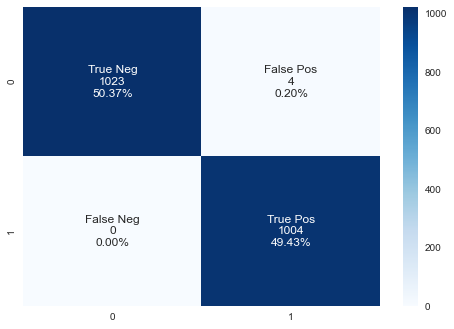

In [134]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def confusion_matrix_plotter(predictions, actuals):
    cf_matrix = confusion_matrix(rf_predictions, y_test)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    return sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

confusion_matrix_plotter(light_gbm_predictions, y_test)


#### Area Under the Curve (AUC)

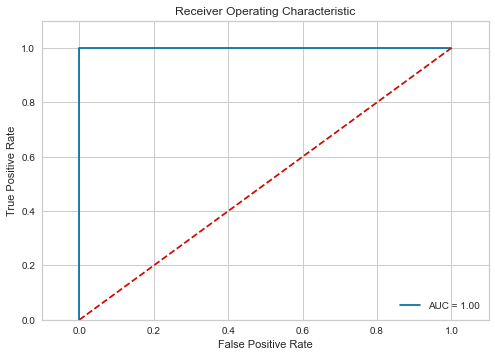

In [137]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = random_forest_class.predict_proba(X_test)
preds = probs[:,1]
y_test = y_test.map({'e':1, 'p':0})
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(tpr, fpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(tpr, fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([0.0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()